In [4]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, Hamiltonian, IsingHamiltonian

In [6]:
#Initializing starting values

visible_size = 2
hidden = 6
H = IsingHamiltonian(n=visible_size)

steps = 1000

seed = 42

#Finding true ground state energy and displaying it
np.random.seed(seed)

energy_list = []
error_list = []
gstate_list =[]

In [24]:

rbm = RBM(visible_size=visible_size, hidden_size=hidden, hamiltonian=H, walker_steps=0)

eig, state = np.linalg.eigh(H)
print(f"Eig: {eig},state: \n{state}")
E_truth = np.min(eig)
e_truth_index = np.where(eig == E_truth)
print(f"Eig index: {e_truth_index}")
gstate = state[e_truth_index[0][1]]
print(f"g state: {gstate}")


Eig: [-0.90065086 -0.90065086  0.90065086  0.90065086],state: 
[[-0.70710678 -0.          0.         -0.70710678]
 [ 0.         -0.70710678  0.70710678  0.        ]
 [ 0.         -0.70710678 -0.70710678  0.        ]
 [-0.70710678  0.          0.          0.70710678]]
Eig index: (array([0, 1], dtype=int64),)
g state: [ 0.         -0.70710678  0.70710678  0.        ]


In [25]:
print(f"RBM wave function: \n{rbm.wave_function()}")
print(f"True ground state: \n{gstate}")

print(f"RBM state error: {np.real(gstate @ rbm.wave_function())}")

RBM wave function: 
[[ 0.44594383-0.08636069j]
 [-0.02774439+0.22812032j]
 [ 0.73262675-0.2468401j ]
 [-0.26818711+0.26696627j]]
True ground state: 
[ 0.         -0.70710678  0.70710678  0.        ]
RBM state error: [0.53766359]


In [26]:
energy_list = rbm.train(iterations=steps, lr=0.01, print_energy=False)

func:train args:[(<src.nqs.RBM object at 0x000002B8F7526820>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 0.5500063896179199 sec


<IPython.core.display.Javascript object>


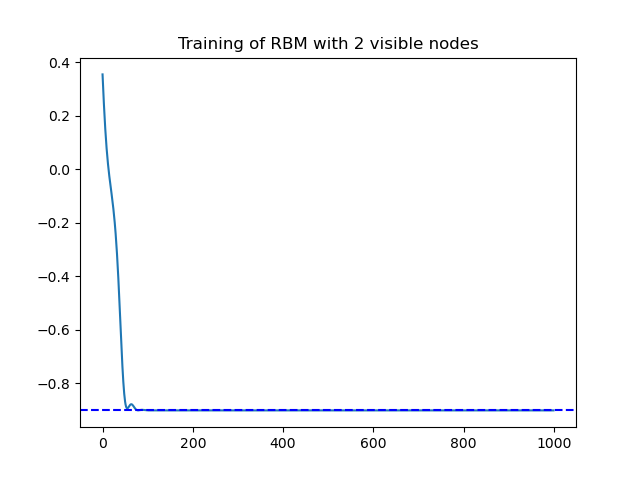

Text(0.5, 1.0, 'Training of RBM with 2 visible nodes')

In [27]:
# plt.ioff() # uncomment to stop plotting in notebook

plt.plot(energy_list)

plt.axhline(y=E_truth, color='b', linestyle='--')
plt.title(f"Training of RBM with {visible_size} visible nodes")


In [28]:
print(f"Ground state energy found: {energy_list[-1]}")
print(f"True GS energy: {E_truth}")
print(f"Error: {np.abs(E_truth-energy_list[-1])}")

Ground state energy found: -0.9006508582949846
True GS energy: -0.9006508582949846
Error: 0.0


In [29]:
print(f"RBM wave function: \n{rbm.wave_function()}")
print(f"True ground state: \n{gstate}")

print(f"RBM state error: {np.abs(gstate)**2 @ np.abs(rbm.wave_function())**2}")

RBM wave function: 
[[0.50058368+0.10939071j]
 [0.47989644-0.08455214j]
 [0.47989644-0.08455214j]
 [0.50058368+0.10939071j]]
True ground state: 
[ 0.         -0.70710678  0.70710678  0.        ]
RBM state error: [0.23744965]
